# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Mississippi" data-toc-modified-id="Mississippi-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mississippi</a></div><div class="lev1 toc-item"><a href="#Illinois" data-toc-modified-id="Illinois-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Illinois</a></div>

In [9]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
plot_dataframe = gpd.plotting.plot_dataframe
import shapely
from shapely.geometry import Point, LineString, MultiLineString, MultiPoint
import smopy

In [11]:
root_dir = "../"

In [12]:
cb_2015_us_state = gpd.read_file(root_dir+"national_data/cb_2015_us_state_500k/cb_2015_us_state_500k.shp").to_crs(epsg=3857)

# Mississippi

/Users/imolk/bin/venv_python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


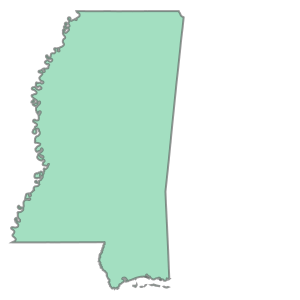

In [13]:
mississippi = cb_2015_us_state.ix[cb_2015_us_state.NAME == "Mississippi"].iloc[0]
mississippi.geometry

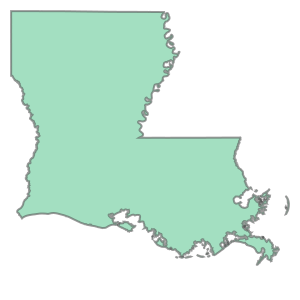

In [14]:
louisiana = cb_2015_us_state.ix[cb_2015_us_state.NAME == "Louisiana"].iloc[0]
louisiana.geometry

In [15]:
border = louisiana.geometry.intersection(mississippi.geometry)

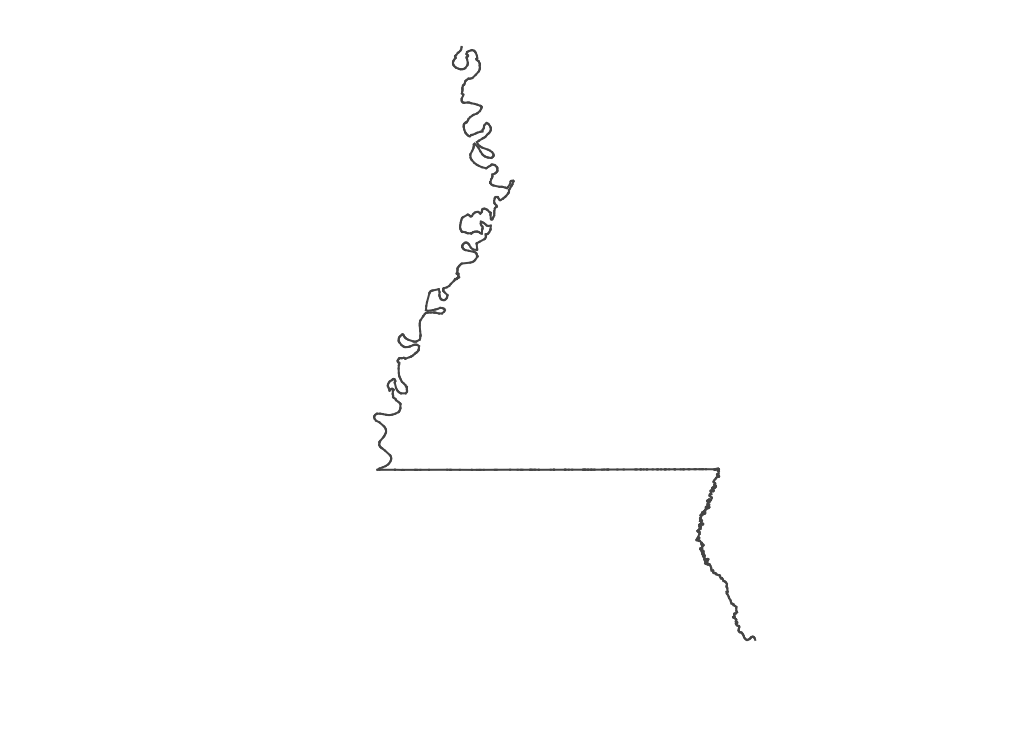

In [16]:
gpd.plotting.plot_multilinestring(plt.gca(), border, color="#444444")
plt.axis("off")
plt.axes().set_aspect('equal', 'datalim')
plt.savefig(root_dir+"figures/mississippi.pdf", bbox_inches="tight")

In [17]:
if isinstance(border, MultiLineString):
    merged_border = shapely.ops.linemerge(border)
else:
    merged_border = border
sentinels = MultiPoint([merged_border.interpolate(x, normalized=True) for x in np.linspace(0,1.0,200)])

In [18]:
s=sentinels[0]

In [19]:
s.x

-10148560.823982406

In [20]:
s.y

3895848.9787876373

In [21]:
print(min([s.y for s in sentinels[124:163]]))
print(max([s.y for s in sentinels[124:163]]))

3632600.9977818155
3633017.478769722


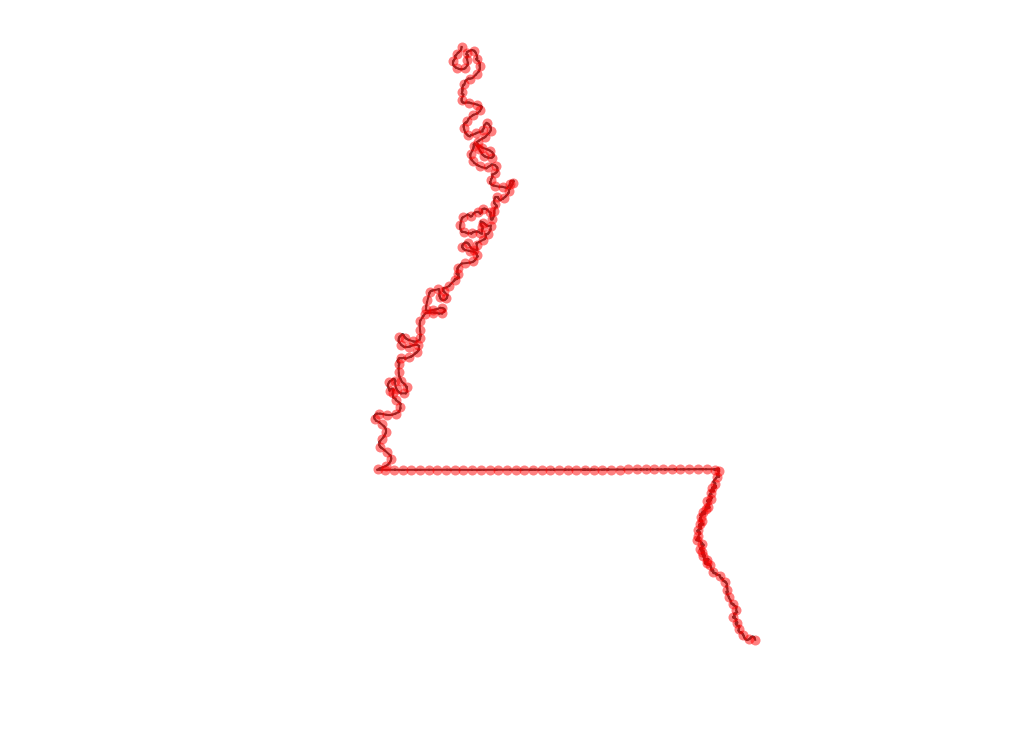

In [22]:
gpd.plotting.plot_multilinestring(plt.gca(), border, color="#444444")
gpd.plotting.plot_series(sentinels, color="red", ax=plt.gca(), alpha=0.5, markersize=5, markeredgecolor="none")
plt.axis("off")
plt.axes().set_aspect('equal', 'datalim')
plt.savefig(root_dir+"figures/mississippi_sentinels.pdf", bbox_inches="tight")

''

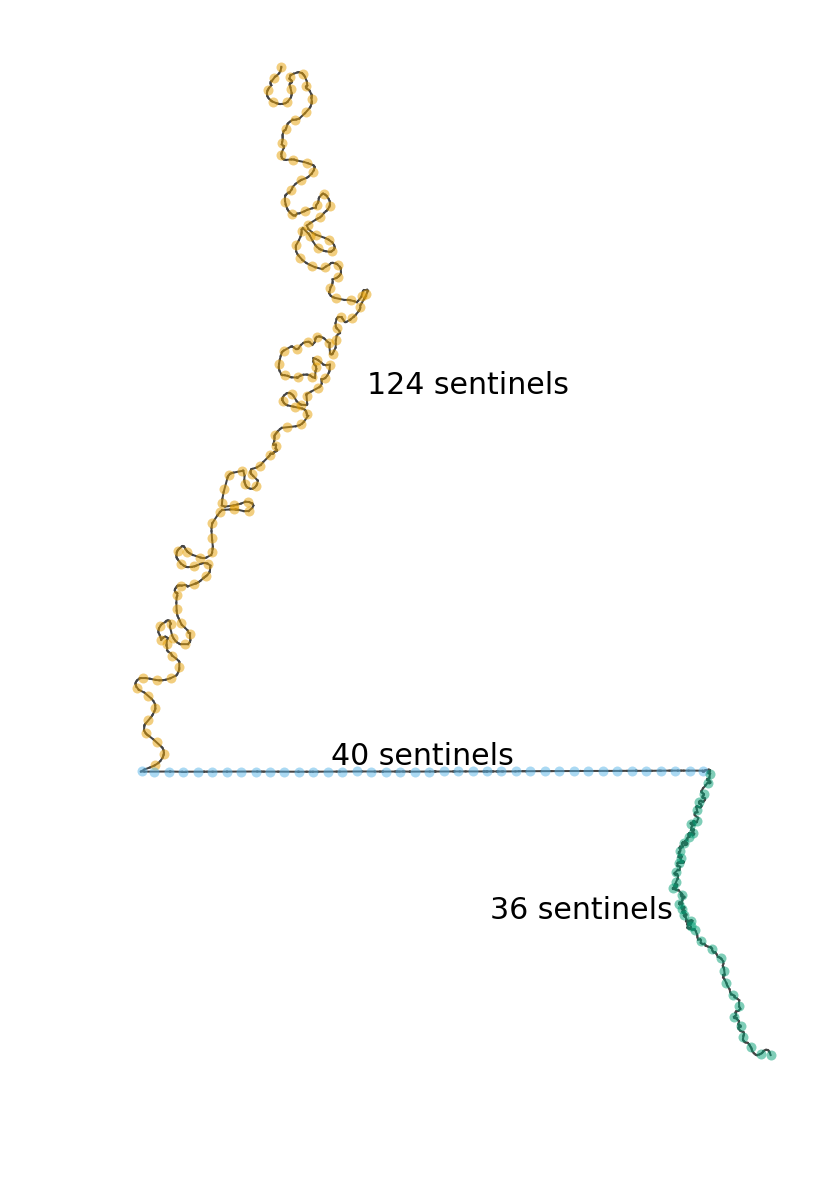

In [36]:
cbbPalette = ("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
plt.gcf().set_size_inches(6.0, 10.0)
sentinels_y = [s.y for s in sentinels]
straight_section = [3632600 < y < 3633018 for y in sentinels_y]
mississippi_section = [y > 3633018 for y in sentinels_y]
pearl_section = [y < 3632600 for y in sentinels_y]
first_straight = np.where(straight_section)[0][0]
last_straight = np.where(straight_section)[0][-1]
mississippi_sentinels = sentinels[0:first_straight]
straight_sentinels = sentinels[first_straight:last_straight+1]
pearl_sentinels = sentinels[last_straight+1:]
gpd.plotting.plot_multilinestring(plt.gca(), border, color="#444444")
gpd.plotting.plot_series(mississippi_sentinels,    color=cbbPalette[0], ax=plt.gca(), alpha=0.5, markersize=5, markeredgecolor="none")
gpd.plotting.plot_series(straight_sentinels, color=cbbPalette[1], ax=plt.gca(), alpha=0.5, markersize=5, markeredgecolor="none")
gpd.plotting.plot_series(pearl_sentinels,       color=cbbPalette[2], ax=plt.gca(), alpha=0.5, markersize=5, markeredgecolor="none")
plt.text(x=max([s.x for s in mississippi_sentinels])+40,
         y=np.mean([s.y for s in mississippi_sentinels]), 
         s="%d sentinels" % len(mississippi_sentinels),
         horizontalalignment="left",
         fontsize=15,
         )
plt.text(x=np.mean([s.x for s in straight_sentinels]),
         y=max([s.y for s in straight_sentinels])+40, 
         s="%d sentinels" % len(straight_sentinels),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontsize=15,
         )
plt.text(x=min([s.x for s in pearl_sentinels])-40,
         y=np.mean([s.y for s in pearl_sentinels]), 
         s="%d sentinels" % len(pearl_sentinels),
         horizontalalignment="right",
         verticalalignment="center",
         fontsize=15,
         )
plt.axis("off")
plt.axes().set_aspect('equal', 'datalim')
plt.savefig(root_dir+"figures/mississippi_counts.pdf", bbox_inches="tight", pad_inches=0)
plt.savefig(root_dir+"figures/mississippi_counts.png", bbox_inches="tight", pad_inches=0)
;

# Illinois

In [24]:
cb_2015_us_county = gpd.read_file(root_dir+"national_data/cb_2015_us_county_500k/cb_2015_us_county_500k.shp")
illinois = cb_2015_us_county[cb_2015_us_county.STATEFP == "17"].to_crs(epsg=3857)

In [25]:
mchenry_latlon=cb_2015_us_county.iloc[2507].geometry
lake_latlon=cb_2015_us_county.iloc[68].geometry

In [26]:
illinois[illinois.NAME == "McHenry"]

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
2507,0500000US17111,1.562336e+09,19832927.0,111,01784815,17111,06,McHenry,17,POLYGON ((-9874860.116991756 5235205.559383298...


In [27]:
illinois[illinois.NAME == "Lake"]

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
68,0500000US17097,1.149077e+09,2.395037e+09,097,01784796,17097,06,Lake,17,POLYGON ((-9818329.105515363 5188469.653998113...


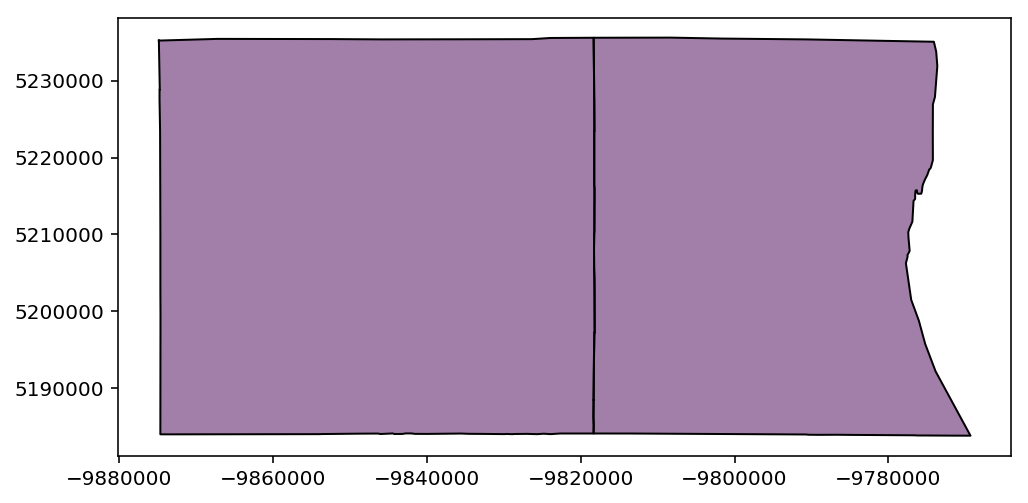

In [28]:
plot_dataframe(illinois[illinois.NAME == "McHenry"])
plot_dataframe(illinois[illinois.NAME == "Lake"], ax=plt.gca())

In [29]:
lakeborder = mchenry_latlon.intersection(lake_latlon)
if isinstance(lakeborder, MultiLineString):
    lakeborder = shapely.ops.linemerge(lakeborder)
else:
    lakeborder = lakeborder
lakesentinels = MultiPoint([lakeborder.interpolate(x, normalized=True) for x in np.linspace(0,1.0,30)])

In [30]:
# smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
# smopy.TILE_SERVER = "http://tile.stamen.com/watercolor/{z}/{x}/{y}.jpg"
# smopy.TILE_SIZE = 256
mchenrymap = smopy.Map((mchenry_latlon.bounds[1], mchenry_latlon.bounds[0]+0.4, mchenry_latlon.bounds[3], lake_latlon.bounds[2]-0.4), z=12)

Lowered zoom level to keep map size reasonable. (z = 11)


In [31]:
ax = mchenrymap.show_mpl(figsize=(8,6), dpi=1200)
sentinel_pixels = [mchenrymap.to_pixels(s.y, s.x) for s in lakesentinels]
sentinels_x = [s[0] for s in sentinel_pixels]
sentinels_y = [s[1] for s in sentinel_pixels]
ax.plot(sentinels_x, sentinels_y, 'o', color="black", markersize=5);
plt.savefig(root_dir+"figures/lakes.pdf", dpi=1000)